# Leaky Integrate-and-Fire Model

In this notes we will use a **leaky integra-and-fire model (LIF)** to simulate subthreshold membrane potential dynamics produced by different external input currents.

### Setup and plot

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def plot_v(pars, v, sp, I):
    """
    Plot membrane potential for a single neuron

    Parameters
    ----------
    pars (dict) : parameter dictionary
    v (numpy array) : voltage trajetory
    sp (list) : spike train
    I (numpy array) : injected current

    Returns
    -------
    figure of membrane potential trajetory for a single neuron and the corresponding input current.
    """

    V_th = pars['V_th']
    dt, range_t = pars['dt'], pars['range_t']
    if sp.size:
        sp_num = (sp / dt).astype(int) - 1
        v[sp_num] += 20  # draw artificial spike
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8))

    ax1.plot(pars['range_t'], v, 'b')
    ax1.axhline(V_th, 0, 1, color='k', ls='--')
    ax1.set_ylabel('V (mV)')
    ax1.legend(["Membrane\npotential", r"Threshold V$_{\mathrm{th}}$"], loc=[1.05, 0.75])
    ax1.set_xlabel('Time (ms)')
    ax1.set_xticks(list(range(0, pars['T'], 25)) + [pars['T']])
    
    ax2.plot(pars['range_t'], I, 'r')
    ax2.set_ylabel('I$_{ext}$ (nA)')
    ax2.set_xlabel('Time (ms)')
    ax2.set_xticks(list(range(0, pars['T'], 25)) + [pars['T']])

### LIF model algorithm

In [11]:
def run_LIF(pars, I_ext):
    """
    Run a simulation for a LIF model given some parameters and external current.

    Parameters
    ----------
    pars (dict): Parameter dictionary.
    I_ext (numpy array) : External current [nA] as a single value or array of the size of simulation.

    Returns
    -------
    v (numpy array) : Membrane potential [mV].
    spike_times (list) : Spike times [ms].
    """

    # Set parameters
    V_th, V_reset = pars['V_th'], pars['V_reset']
    tau_m, R_m = pars['tau_m'], pars['R_m']
    V_init, E_L = pars['V_init'], pars['E_L']
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    tref = pars['tref']

    # Initialize voltage
    v = np.zeros(Lt)
    v[0] = V_init

    # Loop over time
    spike_times = []  # record spike times
    tr = 0.  # the count for refractory duration

    for it in range(Lt - 1):

        if tr > 0:  # check if in refractory period
            v[it] = V_reset
            tr = tr - 1

        elif v[it] >= V_th:  # if voltage over threshold
            spike_times.append(it)
            v[it] = V_reset
            tr = tref / dt  # begins refractory time

        # LIF model increment rule for membrane potential
        dv = (E_L - v[it] + I_ext[it] * R_m) * (dt/tau_m)

        # Update the membrane potential
        v[it + 1] = v[it] + dv

    # Get spike times in ms
    spike_times = np.array(spike_times) * dt

    return v, spike_times

### Default parameters

In [15]:
pars = {
    'V_th':    -55,   # spike threshold [mV]
    'V_reset': -75.,  # reset potential [mV]
    'tau_m':    10.,  # membrane time constant [ms]
    'R_m':      10., # membrane resistance [MO]
    'V_init':  -75.,  # initial potential [mV]
    'E_L':     -75.,  # leak reversal potential [mV]
    'tref':      2.,  # refractory time (ms)
    'T':        500,  # Total duration of simulation [ms]
    'dt':        .1,  # Simulation time step [ms]
}

pars['range_t'] = np.arange(0, pars['T'], pars['dt'])  # Vector of discretized time points [ms]

### Particular examples

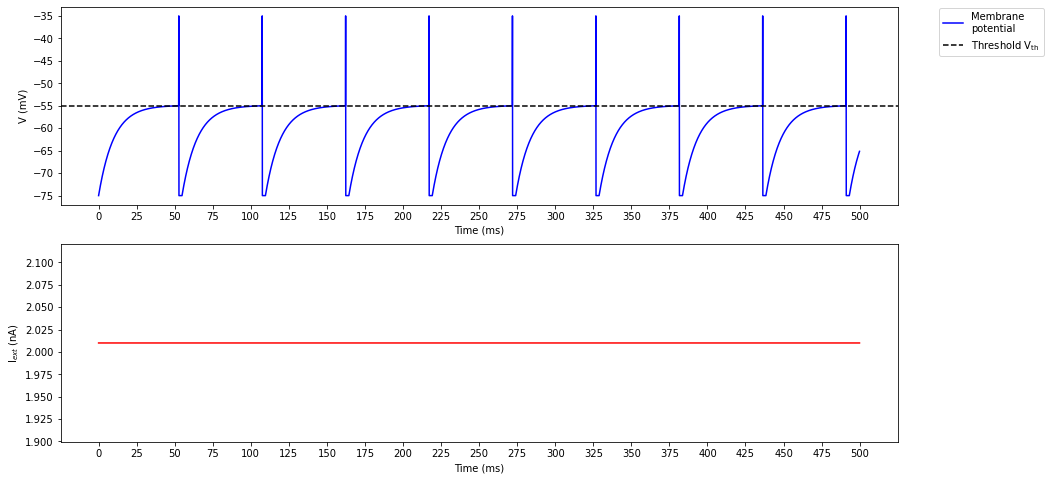

In [20]:
# Constant current
I_const = 2.01*np.ones_like(pars["range_t"])  

# Simulate LIF model
v, sp = run_LIF(pars, I_ext = I_const)

# Visualize
plot_v(pars, v, sp, I_const)

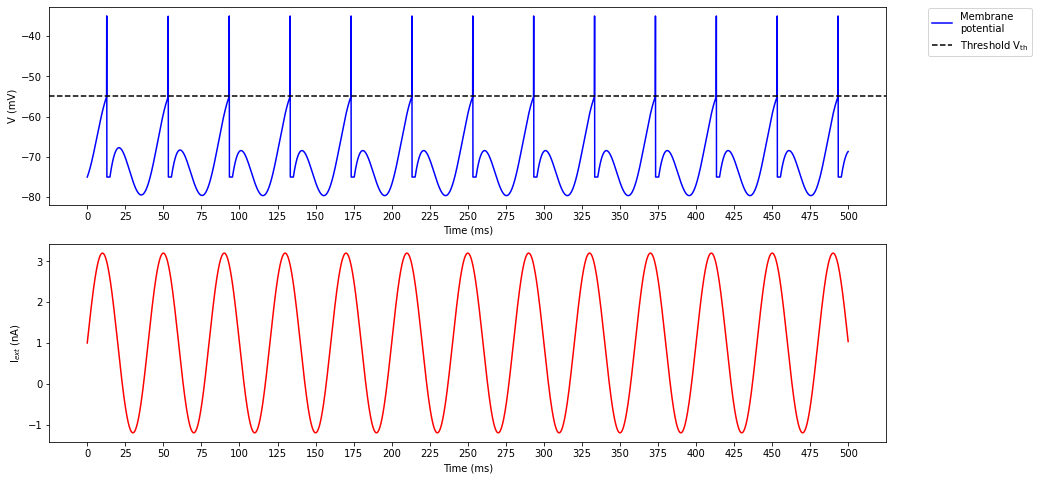

In [25]:
# Sinusoidal current
A = 2.2  # Amplitude
w = 2*np.pi/40  # frecuency
I0 = 1  # offset
I_sin = A* np.sin(w * pars["range_t"]) + I0

# Simulate LIF model
v, sp = run_LIF(pars, I_ext = I_sin)

# Visualize
plot_v(pars, v, sp, I_sin)

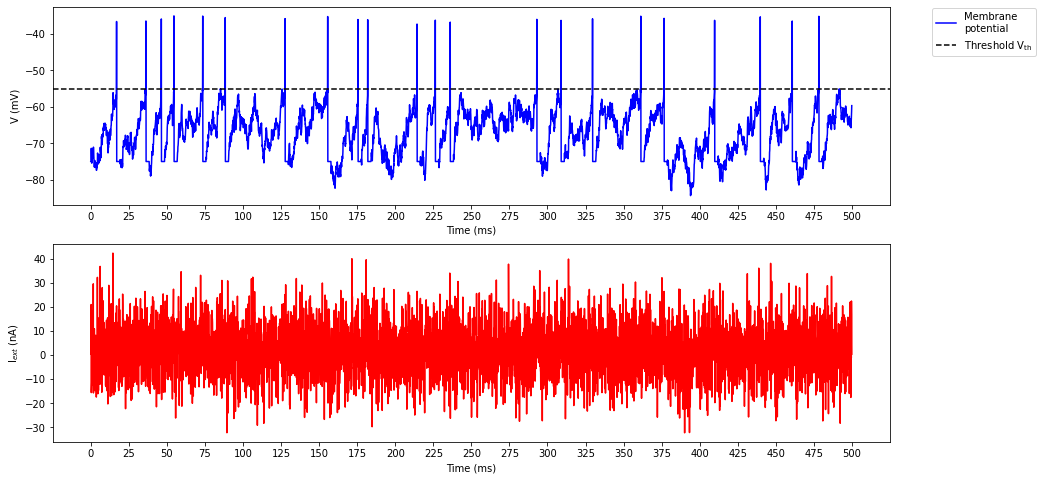

In [31]:
# Gaussian white noise current
mean = 1.9
std = 10.8 
Lt = pars["range_t"].size
I_gwn = np.random.normal(mean, std, size=Lt)

# Simulate LIF model
v, sp = run_LIF(pars, I_ext = I_gwn)

# Visualize
plot_v(pars, v, sp, I_gwn)

## References

1. **Theoretical Neuroscience**: Computational and Mathematical Modeling of Neural Systems - Laurence F. Abbott, Peter Dayan - MIT Press, 2005. **Chapter 5.4**
1. Tutorial 1 of W2D3 of [**Neuromatch Academy**](http://localhost:8890/notebooks/W2D3_Tutorial1_lif_solved.ipynb)